In [1]:
import sqlalchemy as sqlal
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
def extract_from_zillow_by_city (city,state):
    if any(city in s for s in zillow_by_city['RegionName']):
        ind = zillow_by_city.index[(zillow_by_city['RegionName']==city) & (zillow_by_city['State']==state)]
        city_df = zillow_by_city.loc[ind,:]
        city_df = city_df.T
        city_df = city_df.drop(city_df.index[0:7])
        city_df.columns = [city]
        return city_df
    else:
        return "Does not exist in database."

In [3]:
def calculate_moving_average (df):
    MA_day = [14,30,60]
    for MA in MA_day:
        column_name = "MA for %s days" %(str(MA))
        df[column_name] = df['Listing'].rolling(MA).mean()
    return df

Establish connection and pull data from database

In [4]:
username = "root"
password = "123456"
host = "54.244.202.224"
database = "housing"
engine = sqlal.create_engine("mysql://" + username + ":" + password + "@" + host + "/" + database)
con = engine.connect()
data = "zillow_by_city"
zillow_by_city = pd.read_sql('SELECT * FROM %s' %(data), con=con)
con.close()

In [26]:
zillow_by_city.head()

,index,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
0,0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,169300.0,169800.0,170300.0,...,669200,670500,670900,673100,677100,680500,681100,680100,680100,681600
1,1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,157700.0,157600.0,157500.0,...,675300,677100,679400,682300,685800,688500,689900,690800,690300,687700
2,2,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,86500.0,86600.0,86600.0,...,178800,180000,181100,181700,182300,183200,184500,185900,187100,187800
3,3,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,114000.0,115100.0,116100.0,...,227900,227500,227400,227600,227800,228100,228600,228900,229700,230400
4,4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,86600.0,86400.0,86300.0,...,168100,169300,170300,171500,172700,173900,175000,175900,176500,176800


Extract cities from zillow_by_city to create a single dataframe

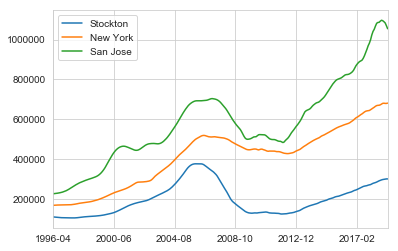

In [5]:
cities = ['Stockton', 'New York', 'San Jose']
states = ['CA', 'NY', 'CA']
usa = pd.DataFrame()
for i in range(0,len(cities)):
    dummy_city = extract_from_zillow_by_city(cities[i],states[i]) 
    usa = pd.concat([usa, dummy_city], axis=1)
usa.columns = cities    
usa.plot()

Analyze a single city

Text(0, 0.5, 'US dollar')

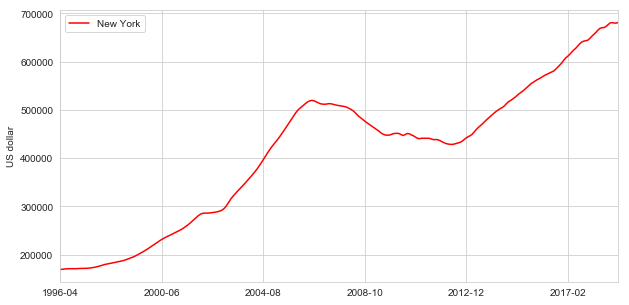

In [6]:
city = 'New York' #Enter the city that you want to analyze
usa[city].plot(legend=True, figsize=(10,5), color='r')
plt.ylabel("US dollar")

In [7]:
city_copy = usa[city].copy()

In [8]:
df = pd.DataFrame(city_copy)
df.rename({city:'Listing'}, axis='columns', inplace=True)

In [9]:
df = calculate_moving_average(df)

Text(0.5, 1.0, 'Moving Average of New York Listing Price')

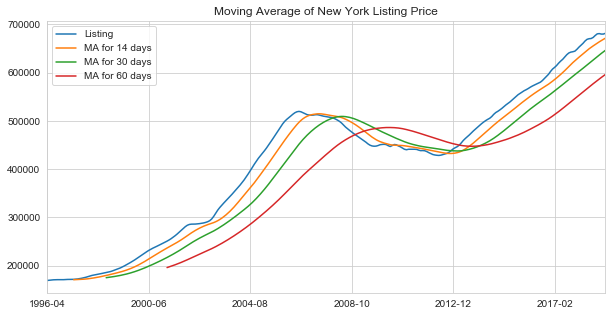

In [10]:
df.plot(legend=True, figsize=(10,5))
plt.title('Moving Average of %s Listing Price' %(city), loc='center') 

In [16]:
df['percent'] = df['Listing'].pct_change().multiply(100)

Text(0, 0.5, 'percent change')

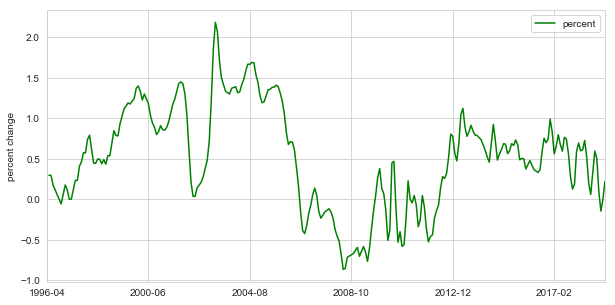

In [17]:
df['percent'].plot(legend=True, figsize=(10,5), color='g' )
plt.ylabel('percent change')

Text(0.5, 0, 'Monthly Percent Change')

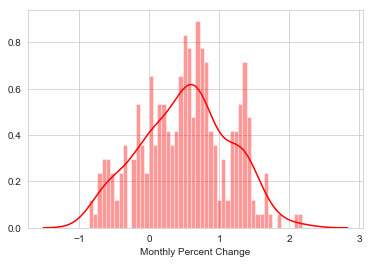

In [22]:
sns.distplot(df['percent'].dropna(), bins=50, color='r')
plt.xlabel('Monthly Percent Change')

In [28]:
df['percent'].mean()

0.5097057505193141